In [1]:
import os

In [2]:
working_dir = '/media/jswaney/Drive/Justin/kc_grant/2018-11-01'

In [3]:
os.listdir(working_dir)

['cell-coordinates_eTango178_somatostatin0.500000.json',
 '.ipynb_checkpoints',
 '2018-12-07_eTango_summary.ipynb',
 'alignment',
 'analysis.csv',
 'analysis_sst.csv',
 'atlas',
 'blobs_eTango177.json',
 'blobs_eTango177_npy.json',
 'blobs_eTango178.json',
 'blobs_eTango178_som.json',
 'cell-coordinates_eTango177_npy.json',
 'cell-coordinates_eTango177_npy0.500000.json',
 'cell-coordinates_eTango177_somatostatin.json',
 'cell-coordinates_eTango177_somatostatin0.500000.json',
 'cell-coordinates_eTango178_npy.json',
 'cell-coordinates_eTango178_npy0.500000.json',
 'cell-coordinates_eTango178_somatostatin.json',
 'eTango177.model',
 'eTango177.model.backup',
 'eTango177_npy.model',
 'eTango178_npy_32.model',
 'eTango178_npy_48.model',
 'eTango178_som.model',
 'gt',
 'patches',
 'patches_eTango177.h5',
 'patches_eTango177_npy.h5',
 'patches_eTango178_npy.h5',
 'patches_eTango178_som.h5',
 'readme.txt',
 'zcoords.npy']

# Load in blobs, patches, rf results, and ground truth

In [4]:
with open(os.path.join(working_dir, 'readme.txt')) as f:
    print(f.read())

Blob detector output (list of x, y, z):
blobs_eTango177.json

Patches for every blob:
patches_eTango177.h5

A PCA + random forest model + the GT used to train it
(a pickle of a dictionary - "x", "y", "z" are the blob coordinates,
"marks" are -1 for negative, 0 for not in GT set and 1 for positive.
eTango177.model

Data is in
/media/share3/SmartSPIM_server/Nov_2018/2018_11_01/20181101_10_58_32_eTango#177_M04w_488LP55_561LP60_647Lp90/Ex_1_Em_1_destriped_stitched



In [5]:
import numpy as np
import h5py
import json

In [6]:
def json_load(path):
    with open(os.path.join(working_dir, path)) as f:
        data = np.asarray(json.load(f))
    return data

In [7]:
blobs_path = 'blobs_eTango177_npy.json'

blobs = json_load(blobs_path)
    
print('Loaded {} blobs'.format(len(blobs)))

Loaded 442251 blobs


In [8]:
patches_path = 'patches_eTango177_npy.h5'

f = h5py.File(os.path.join(working_dir, patches_path), 'r')

print(list(f.keys()))

x = np.asarray(f['x'])
y = np.asarray(f['y'])
z = np.asarray(f['z'])

['patches', 'patches_xy', 'patches_xz', 'patches_yz', 'x', 'y', 'z']


In [9]:
print(x.shape, y.shape, z.shape)

(442242,) (442242,) (442242,)


In [10]:
a = np.asarray(f['patches'][0])

In [11]:
b = np.asarray(f['patches_xy'][0])

In [12]:
np.allclose(a, b)

True

In [13]:
patches_xy = np.asarray(f['patches_xy'])
patches_xz = np.asarray(f['patches_xz'])
patches_yz = np.asarray(f['patches_yz'])
patches_xy.shape

(442242, 31, 31)

In [14]:
from phathom.utils import pickle_load

In [15]:
rf_path = 'eTango177_npy.model'

rf_dict = pickle_load(os.path.join(working_dir, rf_path))

/home/jswaney/anaconda3/envs/phathom/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator PCA from version 0.19.1 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/jswaney/anaconda3/envs/phathom/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.19.1 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/jswaney/anaconda3/envs/phathom/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.19.1 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [16]:
rf_dict.keys()

dict_keys(['pca', 'classifier', 'marks', 'predictions', 'pred_probs', 'x', 'y', 'z'])

In [17]:
labels_gt = rf_dict['marks']
labels_rf = rf_dict['predictions']

In [18]:
labels_gt.shape, labels_rf.shape

((442242,), (442242,))

# Calculate training accuracy of RF classifier

In [19]:
loc = np.where(labels_gt != 0)[0]

In [20]:
correct_flags = ((labels_rf[loc]==1) == (labels_gt[loc]==1))
correct_flags.shape

(364,)

In [21]:
labels_rf.min(), labels_gt.min()

(0, -1)

In [22]:
correct_flags.mean()

1.0

# Calculate the test accuracy of the RF classifier

In [23]:
gt_dir = os.path.join(working_dir, 'gt')

In [24]:
os.listdir(gt_dir)

['points_eTango177_876-2163_2136-2734_1367-1567.json.2018-12-03_14-39-43',
 'points_eTango177_2752-3715_2621-3196_1084-1183.json',
 'points_eTango177_2752-3715_2621-3196_1084-1183.json.2018-11-30_16-04-37',
 'points_eTango177_2752-3715_2621-3196_1084-1183.json.2018-12-03_14-00-50',
 'points_eTango177_2752-3715_2621-3196_1084-1183.json.2018-12-03_14-06-44',
 'points_eTango177_2752-3715_2621-3196_1084-1183.json.2018-12-03_14-23-55',
 'points_eTango177_2752-3715_2621-3196_1084-1183.json.2018-12-03_14-24-01',
 'points_eTango177_876-2163_2136-2734_1367-1567.json',
 'points_eTango177_876-2163_2136-2734_1367-1567.json.2018-11-30_16-01-15',
 'points_eTango177_876-2163_2136-2734_1367-1567.json.2018-12-03_14-39-10',
 'points_eTango177_npy_2752-3715-2621-3196-1084-1183.json',
 'points_eTango177_npy_2752-3715_2621-3196_1084-1183.json',
 'points_eTango177_npy_876-2163_2136-2734_1367-1567.json',
 'points_eTango177_npy_876-2163_2136-2734_1367-1567.json.2018-12-06_09-56-23',
 'points_eTango177_npy_876

In [25]:
points_path = 'points_eTango177_npy_876-2163_2136-2734_1367-1567.json'  # x, y, z order

points = json_load(os.path.join(gt_dir, points_path)).astype(np.int)

points.shape, points.dtype

((481, 3), dtype('int64'))

In [26]:
valid_x = np.where(np.logical_and(x >= 867, x <= 2163))[0]
valid_y = np.where(np.logical_and(y >= 2136, y <= 2734))[0]
valid_z = np.where(np.logical_and(z >= 1367, z <= 1567))[0]
valid = np.intersect1d(np.intersect1d(valid_x, valid_y), valid_z)
valid.shape

(1320,)

In [27]:
points_patches = np.column_stack((x[valid], y[valid], z[valid]))
points_patches.shape

(1320, 3)

In [28]:
from scipy.spatial.distance import cdist

In [29]:
distances = cdist(points, points_patches)
distances.shape

(481, 1320)

In [30]:
min_distances = distances.min(axis=1)
loc_min = distances.argmin(axis=1)

loc_match = loc_min[np.where(min_distances < 6)]

In [31]:
should_be_pos = points_patches[loc_match]
should_be_pos.shape

(451, 3)

In [32]:
loc = np.asarray([np.where(np.logical_and(np.logical_and(x == xi, y == yi), z == zi))[0][0] for (xi, yi, zi) in should_be_pos])
loc[:10]

array([271913, 273496, 273326, 274193, 275110, 275850, 275315, 275313,
       276411, 274001])

In [33]:
fn = np.sum(labels_rf[loc] == 0)
fn

82

In [34]:
loc_neg = np.setdiff1d(valid, loc)

In [35]:
fp = np.sum(labels_rf[loc_neg] == 1)
fp

35

In [36]:
1 - (fn + fp) / 451

0.7405764966740577

# Train ADGM on the same data

In [5]:
from itertools import cycle
import torch
import numpy as np
import tifffile
from torch.utils.data import SubsetRandomSampler, DataLoader
from torch.autograd import Variable
from torchvision.datasets import DatasetFolder
from torchvision import transforms
import matplotlib.pyplot as plt
from phathom.phenotype.models import AuxiliaryDeepGenerativeModel
from phathom.phenotype.inference import SVI, DeterministicWarmup, ImportanceWeightedSampler
from phathom.phenotype.utils import onehot

In [129]:
patches = np.stack((patches_xy, patches_xz, patches_yz), axis=-1).astype(np.float32)
patches.shape, patches.dtype

((442242, 31, 31, 3), dtype('float32'))

In [388]:
output_dir = '/home/jswaney/patches_xy'

path = os.path.join(working_dir, output_dir)

os.mkdir(path)

In [389]:
# unlabeled
os.mkdir(os.path.join(path, 'unlabeled'))
os.mkdir(os.path.join(path, 'unlabeled', 'class_0'))
# labeled
os.mkdir(os.path.join(path, 'labeled'))
os.mkdir(os.path.join(path, 'labeled', 'class_0'))
os.mkdir(os.path.join(path, 'labeled', 'class_1'))

In [6]:
import tifffile
from tqdm import tqdm
from skimage.transform import resize

In [385]:
#scale to -1, 1 (mean is not zero)
max_val = patches_xy.max()
min_val = patches_xy.min()
normalized_patches = 2*(patches_xy - min_val) / (max_val - min_val) - 1

In [415]:
mean_val = patches_xy.mean()
width = max_val - min_val
normalized_patches = (patches_xy - mean_val) / (max_val - min_val)

In [416]:
normalized_patches.min(), normalized_patches.max()

(-0.03480810966568479, 0.9651918903343152)

In [418]:
for i, (lbl, patch) in tqdm(enumerate(zip(labels_gt, normalized_patches)), total=normalized_patches.shape[0]):
#     resized_patch = resize(patch, (32, 32)).astype(np.float32)
    filename = '{0:06d}.tif'.format(i)
    if lbl == 0:
        img_path = os.path.join(path, 'unlabeled', 'class_0', filename)
    elif lbl == -1:
        img_path = os.path.join(path, 'labeled', 'class_0', filename)
    else:
        img_path = os.path.join(path, 'labeled', 'class_1', filename)
    tifffile.imsave(img_path, patch.astype(np.float32))





  0%|          | 0/442242 [00:00<?, ?it/s]



  0%|          | 229/442242 [00:00<03:13, 2285.37it/s]



  0%|          | 469/442242 [00:00<03:10, 2318.13it/s]



  0%|          | 710/442242 [00:00<03:08, 2344.65it/s]



  0%|          | 935/442242 [00:00<03:10, 2313.66it/s]



  0%|          | 1175/442242 [00:00<03:08, 2336.32it/s]



  0%|          | 1436/442242 [00:00<03:02, 2410.85it/s]



  0%|          | 1686/442242 [00:00<03:00, 2434.07it/s]



  0%|          | 1937/442242 [00:00<02:59, 2454.69it/s]



  0%|          | 2190/442242 [00:00<02:57, 2475.06it/s]



  1%|          | 2450/442242 [00:01<02:55, 2508.98it/s]



  1%|          | 2700/442242 [00:01<02:55, 2504.95it/s]



  1%|          | 2955/442242 [00:01<02:54, 2517.05it/s]



  1%|          | 3219/442242 [00:01<02:52, 2550.79it/s]



  1%|          | 3491/442242 [00:01<02:48, 2598.99it/s]



  1%|          | 3764/442242 [00:01<02:46, 2634.30it/s]



  1%|          | 4027/442242 [00:01<02:47, 2611.47it/s]



  1%|     

 13%|█▎        | 58983/442242 [00:23<02:41, 2373.02it/s]



 13%|█▎        | 59236/442242 [00:23<02:38, 2416.22it/s]



 13%|█▎        | 59482/442242 [00:23<02:37, 2428.33it/s]



 14%|█▎        | 59737/442242 [00:23<02:35, 2463.44it/s]



 14%|█▎        | 59984/442242 [00:23<02:37, 2420.98it/s]



 14%|█▎        | 60227/442242 [00:23<02:39, 2402.23it/s]



 14%|█▎        | 60477/442242 [00:23<02:37, 2429.08it/s]



 14%|█▎        | 60721/442242 [00:23<02:39, 2390.32it/s]



 14%|█▍        | 60961/442242 [00:24<02:40, 2382.67it/s]



 14%|█▍        | 61200/442242 [00:24<02:43, 2331.36it/s]



 14%|█▍        | 61447/442242 [00:24<02:40, 2369.40it/s]



 14%|█▍        | 61685/442242 [00:24<02:42, 2337.67it/s]



 14%|█▍        | 61938/442242 [00:24<02:39, 2390.98it/s]



 14%|█▍        | 62187/442242 [00:24<02:37, 2418.69it/s]



 14%|█▍        | 62438/442242 [00:24<02:35, 2445.25it/s]



 14%|█▍        | 62697/442242 [00:24<02:32, 2486.05it/s]



 14%|█▍        | 62950/442242 [00:24<02:

 27%|██▋       | 117574/442242 [00:46<02:06, 2574.25it/s]



 27%|██▋       | 117845/442242 [00:46<02:04, 2612.33it/s]



 27%|██▋       | 118125/442242 [00:46<02:01, 2664.20it/s]



 27%|██▋       | 118393/442242 [00:46<02:08, 2528.05it/s]



 27%|██▋       | 118664/442242 [00:46<02:05, 2578.41it/s]



 27%|██▋       | 118944/442242 [00:46<02:02, 2639.26it/s]



 27%|██▋       | 119226/442242 [00:46<02:00, 2688.18it/s]



 27%|██▋       | 119507/442242 [00:47<01:58, 2721.71it/s]



 27%|██▋       | 119790/442242 [00:47<01:57, 2750.84it/s]



 27%|██▋       | 120078/442242 [00:47<01:55, 2788.12it/s]



 27%|██▋       | 120359/442242 [00:47<01:55, 2794.24it/s]



 27%|██▋       | 120639/442242 [00:47<02:00, 2673.68it/s]



 27%|██▋       | 120914/442242 [00:47<01:59, 2693.81it/s]



 27%|██▋       | 121189/442242 [00:47<01:58, 2708.80it/s]



 27%|██▋       | 121461/442242 [00:47<02:00, 2667.31it/s]



 28%|██▊       | 121729/442242 [00:47<02:01, 2635.80it/s]



 28%|██▊       | 121994/

 39%|███▉      | 173306/442242 [01:09<01:47, 2508.94it/s]



 39%|███▉      | 173595/442242 [01:09<01:42, 2609.62it/s]



 39%|███▉      | 173877/442242 [01:09<01:40, 2667.88it/s]



 39%|███▉      | 174157/442242 [01:09<01:39, 2705.96it/s]



 39%|███▉      | 174433/442242 [01:09<01:38, 2719.51it/s]



 40%|███▉      | 174711/442242 [01:09<01:37, 2734.28it/s]



 40%|███▉      | 174985/442242 [01:09<01:38, 2724.39it/s]



 40%|███▉      | 175258/442242 [01:10<01:39, 2690.85it/s]



 40%|███▉      | 175541/442242 [01:10<01:37, 2729.41it/s]



 40%|███▉      | 175815/442242 [01:10<01:38, 2715.36it/s]



 40%|███▉      | 176087/442242 [01:10<01:37, 2716.49it/s]



 40%|███▉      | 176372/442242 [01:10<01:36, 2753.35it/s]



 40%|███▉      | 176654/442242 [01:10<01:35, 2771.94it/s]



 40%|████      | 176932/442242 [01:10<01:36, 2739.67it/s]



 40%|████      | 177207/442242 [01:10<01:36, 2736.65it/s]



 40%|████      | 177486/442242 [01:10<01:36, 2750.90it/s]



 40%|████      | 177762/

 53%|█████▎    | 234283/442242 [01:32<01:16, 2704.76it/s]



 53%|█████▎    | 234554/442242 [01:32<01:19, 2605.38it/s]



 53%|█████▎    | 234819/442242 [01:32<01:19, 2616.82it/s]



 53%|█████▎    | 235083/442242 [01:32<01:18, 2622.74it/s]



 53%|█████▎    | 235347/442242 [01:32<01:18, 2626.08it/s]



 53%|█████▎    | 235610/442242 [01:32<01:19, 2606.31it/s]



 53%|█████▎    | 235871/442242 [01:33<01:20, 2564.95it/s]



 53%|█████▎    | 236128/442242 [01:33<01:29, 2309.68it/s]



 53%|█████▎    | 236365/442242 [01:33<01:29, 2292.25it/s]



 54%|█████▎    | 236643/442242 [01:33<01:25, 2418.51it/s]



 54%|█████▎    | 236918/442242 [01:33<01:21, 2508.94it/s]



 54%|█████▎    | 237179/442242 [01:33<01:20, 2536.58it/s]



 54%|█████▎    | 237449/442242 [01:33<01:19, 2583.31it/s]



 54%|█████▍    | 237725/442242 [01:33<01:17, 2633.62it/s]



 54%|█████▍    | 237991/442242 [01:33<01:18, 2606.52it/s]



 54%|█████▍    | 238253/442242 [01:33<01:19, 2561.48it/s]



 54%|█████▍    | 238538/

 67%|██████▋   | 295520/442242 [01:55<00:53, 2724.38it/s]



 67%|██████▋   | 295796/442242 [01:55<00:53, 2731.01it/s]



 67%|██████▋   | 296072/442242 [01:55<00:53, 2739.56it/s]



 67%|██████▋   | 296347/442242 [01:55<00:53, 2722.55it/s]



 67%|██████▋   | 296620/442242 [01:55<00:54, 2657.56it/s]



 67%|██████▋   | 296887/442242 [01:55<00:54, 2645.47it/s]



 67%|██████▋   | 297165/442242 [01:56<00:54, 2679.81it/s]



 67%|██████▋   | 297434/442242 [01:56<00:54, 2653.96it/s]



 67%|██████▋   | 297700/442242 [01:56<00:54, 2654.73it/s]



 67%|██████▋   | 297984/442242 [01:56<00:53, 2707.23it/s]



 67%|██████▋   | 298268/442242 [01:56<00:52, 2743.80it/s]



 68%|██████▊   | 298549/442242 [01:56<00:52, 2762.84it/s]



 68%|██████▊   | 298840/442242 [01:56<00:51, 2803.90it/s]



 68%|██████▊   | 299124/442242 [01:56<00:50, 2814.46it/s]



 68%|██████▊   | 299406/442242 [01:56<00:50, 2811.25it/s]



 68%|██████▊   | 299688/442242 [01:56<00:50, 2811.65it/s]



 68%|██████▊   | 299971/

 81%|████████  | 357356/442242 [02:18<00:30, 2790.86it/s]



 81%|████████  | 357636/442242 [02:18<00:32, 2638.15it/s]



 81%|████████  | 357902/442242 [02:18<00:33, 2500.36it/s]



 81%|████████  | 358169/442242 [02:18<00:33, 2547.50it/s]



 81%|████████  | 358436/442242 [02:18<00:32, 2580.56it/s]



 81%|████████  | 358703/442242 [02:18<00:32, 2603.81it/s]



 81%|████████  | 358984/442242 [02:19<00:31, 2661.92it/s]



 81%|████████  | 359261/442242 [02:19<00:30, 2692.62it/s]



 81%|████████▏ | 359542/442242 [02:19<00:30, 2725.80it/s]



 81%|████████▏ | 359821/442242 [02:19<00:30, 2744.56it/s]



 81%|████████▏ | 360096/442242 [02:19<00:31, 2625.12it/s]



 81%|████████▏ | 360377/442242 [02:19<00:30, 2675.37it/s]



 82%|████████▏ | 360660/442242 [02:19<00:29, 2719.83it/s]



 82%|████████▏ | 360947/442242 [02:19<00:29, 2760.87it/s]



 82%|████████▏ | 361224/442242 [02:19<00:29, 2731.27it/s]



 82%|████████▏ | 361506/442242 [02:19<00:29, 2756.54it/s]



 82%|████████▏ | 361791/

 95%|█████████▍| 419196/442242 [02:41<00:08, 2612.54it/s]



 95%|█████████▍| 419459/442242 [02:41<00:08, 2613.46it/s]



 95%|█████████▍| 419722/442242 [02:41<00:08, 2579.24it/s]



 95%|█████████▍| 419981/442242 [02:41<00:08, 2546.57it/s]



 95%|█████████▌| 420237/442242 [02:41<00:09, 2421.43it/s]



 95%|█████████▌| 420497/442242 [02:41<00:08, 2471.94it/s]



 95%|█████████▌| 420758/442242 [02:42<00:08, 2510.40it/s]



 95%|█████████▌| 421024/442242 [02:42<00:08, 2552.57it/s]



 95%|█████████▌| 421291/442242 [02:42<00:08, 2584.12it/s]



 95%|█████████▌| 421566/442242 [02:42<00:07, 2631.50it/s]



 95%|█████████▌| 421851/442242 [02:42<00:07, 2693.05it/s]



 95%|█████████▌| 422142/442242 [02:42<00:07, 2753.13it/s]



 96%|█████████▌| 422419/442242 [02:42<00:07, 2743.66it/s]



 96%|█████████▌| 422706/442242 [02:42<00:07, 2779.60it/s]



 96%|█████████▌| 422995/442242 [02:42<00:06, 2810.26it/s]



 96%|█████████▌| 423285/442242 [02:42<00:06, 2835.84it/s]



 96%|█████████▌| 423576/

In [ ]:
patches_tensor = torch.from_numpy(patches)
patches_tensor.size()

In [ ]:
dataset = torch.utils.data.TensorDataset(patches_tensor)

In [133]:
cuda = torch.cuda.is_available()
cuda

True

In [137]:
idx_unlabeled = np.where(labels_gt == 0)[0]
idx_train = np.where(labels_gt != 0)[0]
idx_val = valid

array([300737])

In [ ]:
batch_size = 32
num_workers = 1

unlabeled = DataLoader(unlabeled_dataset,
                       batch_size=batch_size,
                       sampler=SubsetRandomSampler(idx_unlabeled),
                       num_workers=nb_workers,
                       pin_memory=cuda)



In [134]:
y_dim = 2
z_dim = 100
a_dim = 100
h_dim = [500, 500]

model = AuxiliaryDeepGenerativeModel([31*31*3, y_dim, z_dim, a_dim, h_dim])

/home/jswaney/phathom/phathom/phenotype/models/vae.py:114: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  init.xavier_normal(m.weight.data)
/home/jswaney/phathom/phathom/phenotype/models/dgm.py:50: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  init.xavier_normal(m.weight.data)


Sigmoid output layer isn't ideal. Try autoencoder + classifier first to simplify things. The loss should be MSE for reconstruction plus a binary cross entropy loss for the classification.

In [147]:
coords = json_load(os.path.join(working_dir, 'cell-coordinates_eTango177_npy.json'))

In [148]:
coords.shape

(72092, 3)

In [149]:
rf_dict

<_io.TextIOWrapper name='/media/jswaney/Drive/Justin/kc_grant/2018-11-01/blobs_eTango177_npy.json' mode='r' encoding='UTF-8'>

In [ ]:
# Torch GAN

In [7]:
import torch
import sys
sys.path.append('/home/jswaney/ImprovedGAN-pytorch')

In [419]:
D = torch.load(os.path.join('/home/jswaney/ImprovedGAN-pytorch/models', 'D.pkl'))

/home/jswaney/anaconda3/envs/phathom/lib/python3.7/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleList' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [432]:
path = '/home/jswaney/patches_xy/labeled/class_1'
nb_patches = 100

files = os.listdir(path)

idx = np.arange(len(files))
np.random.shuffle(idx)
idx = idx[:nb_patches]

patches = []
for i, file in enumerate(files):
    if i in idx:
        if file.endswith('.tif'):
            patches.append(tifffile.imread(os.path.join(path, file)).T)
        
len(patches)

100

In [433]:
patches_np = np.asarray(patches).astype(np.float32)
print(patches_np.shape)
patches = torch.from_numpy(patches_np)
print(patches.shape)
patches = patches.cuda()
print(patches.device)

(100, 31, 31)
torch.Size([100, 31, 31])
cuda:0


In [434]:
outputs = D.forward(patches, cuda=True)
labels = torch.max(outputs, 1)[1]
labels = labels.cpu().numpy()

In [435]:
idx0 = np.where(labels == 0)[0]
idx1 = np.where(labels == 1)[0]

len(idx0), len(idx1)

(97, 3)

In [436]:
np.random.shuffle(idx0)
np.random.shuffle(idx1)

In [437]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


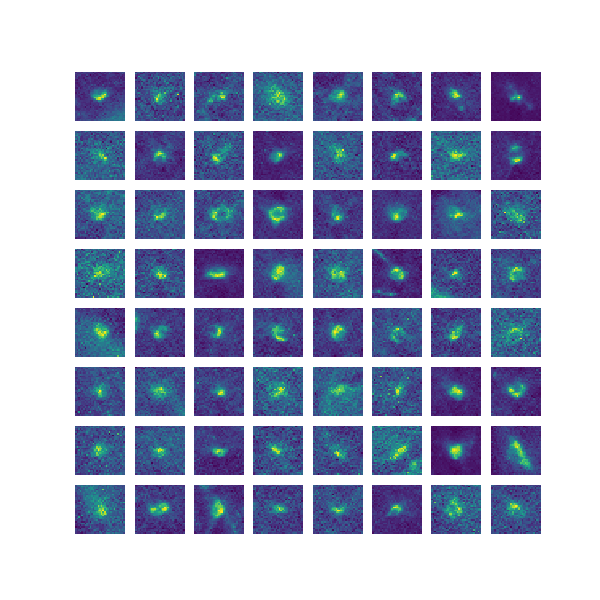

In [440]:
plt.figure(figsize=(6, 6))
for s, i in enumerate(idx0[:64]):
    patch = patches_np[i]
    plt.subplot(8, 8, s+1)
    plt.imshow(patch)
    plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


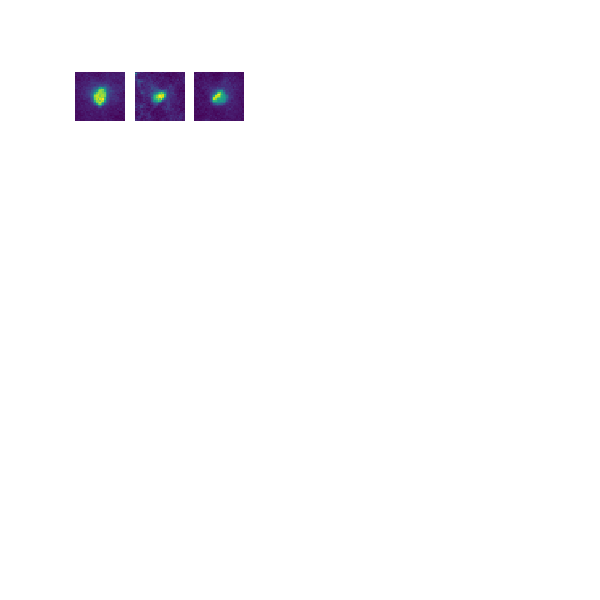

In [441]:
plt.figure(figsize=(6, 6))
for s, i in enumerate(idx1[:64]):
    patch = patches_np[i]
    plt.subplot(8, 8, s+1)
    plt.imshow(patch)
    plt.axis('off')
plt.show()

# Try bootstrapped CNN

In [ ]:
model = torch.load('/home/jswaney/semipatch/cnn.pt')